In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')


In [18]:
#.............................................................................................overview

In [2]:
df=pd.read_csv('http://bit.ly/kaggletrain')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#.....................................................................................dropping required columns

In [37]:
x= [i for i in df.columns if df[i].count() / len(df) >= 0.5]
x

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

In [38]:
y=[]
for j in df.columns:
    if df[j].count()/len(df)>=0.5:
        y.append(j)
        
y        

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

In [36]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [64]:
for k in df.columns:
    if k not in y:
        print(k)
        

Cabin


In [40]:
#...............................................................................................basic analysis

In [42]:
df.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O')]

In [44]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [47]:
df_num=df.select_dtypes(include=['float64','int64'])
df_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa31c5a7e50>,
      dtype=object)

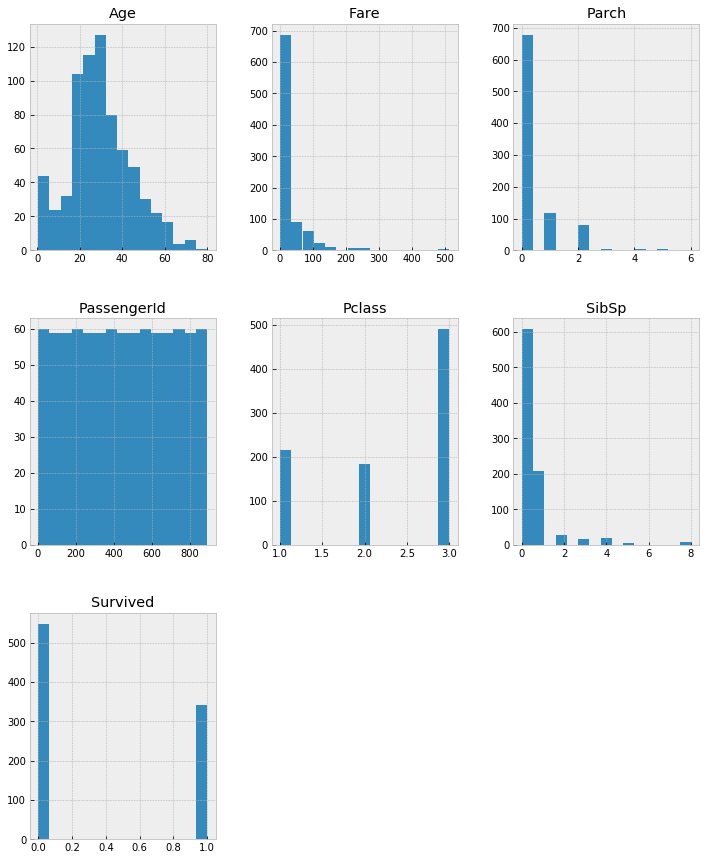

In [54]:
df_num.hist(bins=15,figsize=(12,15))


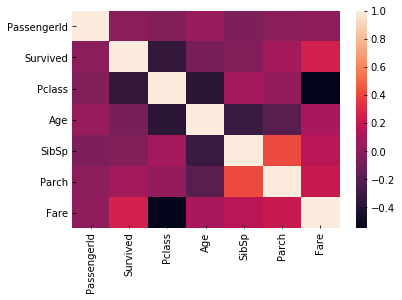

In [77]:
sns.heatmap(df_num.corr())

In [ ]:
#.................................................................................specific analysis take i.e Fare

In [62]:
# corelation with all others
df_num.corr()['Fare']

PassengerId    0.012658
Survived       0.257307
Pclass        -0.549500
Age            0.096067
SibSp          0.159651
Parch          0.216225
Fare           1.000000
Name: Fare, dtype: float64

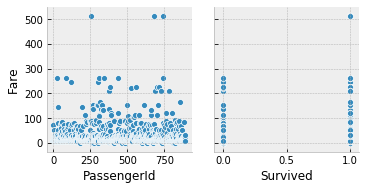

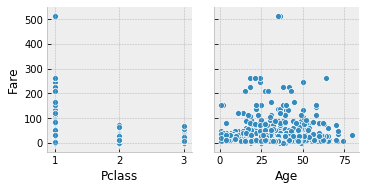

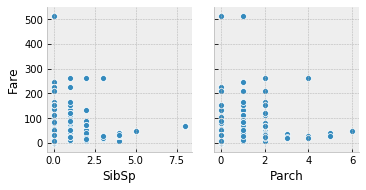

In [85]:
for i in range(0,len(df_num.columns)-1,2):
    sns.pairplot(data=df_num,x_vars=df_num.columns[i:i+2],y_vars='Fare')

In [90]:
# way to make each column's seperate comparison with Fare
# plus any zeroes of that column will be removed
df_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [88]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'Fare']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

In [89]:
individual_features_df

[     PassengerId     Fare
 0              1   7.2500
 1              2  71.2833
 2              3   7.9250
 3              4  53.1000
 4              5   8.0500
 ..           ...      ...
 886          887  13.0000
 887          888  30.0000
 888          889  23.4500
 889          890  30.0000
 890          891   7.7500
 
 [891 rows x 2 columns],
      Survived     Fare
 1           1  71.2833
 2           1   7.9250
 3           1  53.1000
 8           1  11.1333
 9           1  30.0708
 ..        ...      ...
 875         1   7.2250
 879         1  83.1583
 880         1  26.0000
 887         1  30.0000
 889         1  30.0000
 
 [342 rows x 2 columns],
      Pclass     Fare
 0         3   7.2500
 1         1  71.2833
 2         3   7.9250
 3         1  53.1000
 4         3   8.0500
 ..      ...      ...
 886       2  13.0000
 887       1  30.0000
 888       3  23.4500
 889       1  30.0000
 890       3   7.7500
 
 [891 rows x 2 columns],
       Age     Fare
 0    22.0   7.2500
 1 